# Machine Learning Implications on ETF

In [22]:
import pandas as pd
import numpy as np
import scipy
import pandas.util.testing as tm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


# 1. Financial products

## 1.1 What is an Exchange-Traded Fund (ETF)?

An exchange-traded fund (ETF) is an investment product that trades on an exchange like a company share. 

The exact mechanism is that the fund provider, such as MSCI or iShares will consider a universe of assets (ranging from stocks, bonds, commodities, currencies and or other derivatives) and creates a basket of these assets. Fund providers subsequently sell shares of this basket on to other investors on the secondary stock exchange with a unique ticker just like buying shares of a company. As such, ETFs offer diversification commonly found in mutual funds but also offers the open-endedness and as such, liquidity, through the offering on a stock exchange, like a stock. 

Common examples include SPDR S&P 500 Trust ETF which trades on NYSE Arca as `SPY` or the Vanguard FTSE Developed Markets ETF trading on NYSE Arca as `VEA`.

**Pros:** 
1. Easy way to gain diversified exposure to basket of assets
1. Lower fees than mutual fund (especially with increasing fee pressure)
1. Generally, higher liquidity than single name constituent stocks
1. Generally, higher tax efficiency compared to mutual funds due to lower turnover

**Cons:** 
1. Limited range of products or customization - the investor has little say over fund provider's choice
1. Despite meaning to track underlying assets passively, speed and cost of execution will add to tracking error, and sometimes, unintended large deviations from the underlying. A case in point is the `XIV` ETF which tracked inverse volatility -- it went bust in 2018. 
1. Increasing AUM growing under ETFs have changed a product intended to passively track a market to now move the market on rebalances of the fund -- this is an unintended effect.

As of end 2019, there is some US$7trillion AUM in ETFs.

## 1.2 Pick one of the funds in the data set and find the weightings.  Show in Python table.

We are unsure what weightings these refer to - they could be factor style weightings, sector weightings, asset weightings etc. As there are no other questions which depend on this question, we choose sector weightings.

According to https://www.msci.com  MSCI United Kingdom Index (USD) sector weights are:
<br /><br />
<img src='https://drive.google.com/uc?id=1jzkCh3qnAQaaRLGo9sG8U7vV52YPufJI' />

In [23]:
weights = [['Consumer Staples', 19.69], ['Financials', 17.65],
               ['Health Care', 13.67],      ['Industrials', 11.59],
               ['Materials', 10.71],        ['Energy', 8.52],
               ['Consumer Discretionary', 6.72], ['Communication Services', 4.48],
               ['Utilities', 4.26],         ['Information Technology', 1.4],
               ['Real Estate', 1.3]]
print('The MSCI UK ETF:') 
weightsDf = pd.DataFrame(weights, columns=['Sector', 'Weight (%)']) 
print(weightsDf.to_string(index=False))

The MSCI UK ETF:
Sector  Weight (%)
      Consumer Staples       19.69
            Financials       17.65
           Health Care       13.67
           Industrials       11.59
             Materials       10.71
                Energy        8.52
Consumer Discretionary        6.72
Communication Services        4.48
             Utilities        4.26
Information Technology        1.40
           Real Estate        1.30


# 2. Data Importing

## 2.1 Import the data from the provided .csv file


#### Approach A

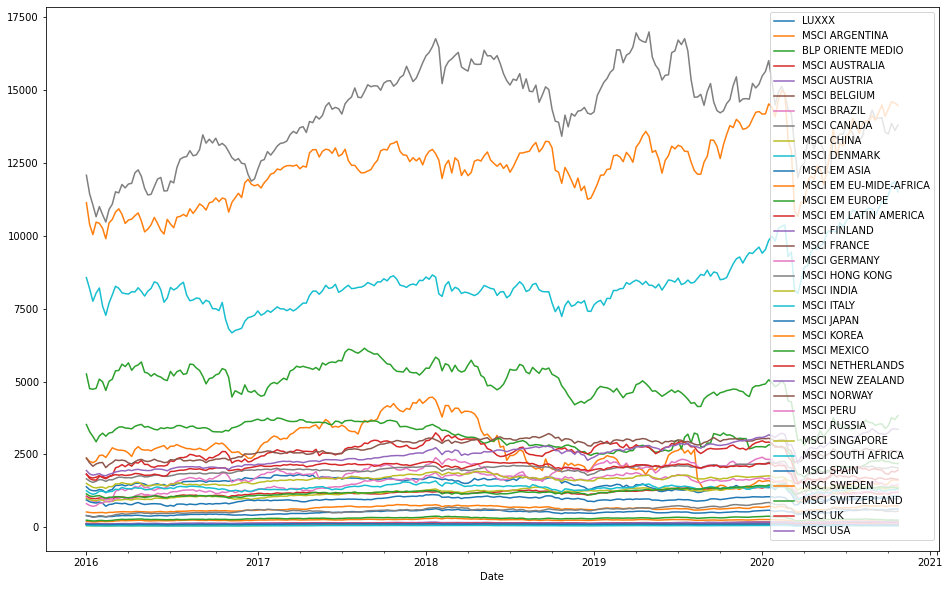

In [24]:
df = pd.read_csv('data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df.plot(figsize=(16,10))
pyplot.show()

# One-dimensional data summaries

## 3.1 Summarize the min, max, mean, median, and standard deviation of each column.

In [25]:
df.describe().T[['min','max','mean','50%','std']].rename(columns={'50%':'median'})

,min,max,mean,median,std
LUXXX,871.500,1812.0100,1457.231905,1491.08100,238.611226
MSCI ARGENTINA,844.090,4467.4100,2526.652262,2541.97500,899.378857
BLP ORIENTE MEDIO,1722.870,3750.8655,3029.482978,3113.41405,516.678825
MSCI AUSTRALIA,957.150,1431.4600,1183.940159,1177.37500,101.261295
MSCI AUSTRIA,78.290,177.5800,127.418889,130.63500,24.770889
MSCI BELGIUM,57.440,107.3400,91.290238,95.01500,12.106033
MSCI BRAZIL,879.170,2404.7400,1813.989167,1860.96000,354.986912
MSCI CANADA,1503.010,2261.2800,1970.821627,1990.63000,143.502890
MSCI CHINA,48.160,103.5400,76.788214,78.71000,13.192648
MSCI DENMARK,6671.370,11852.3600,8447.657738,8227.80500,978.216958


# Data Visualizing

## 4.1 Write a Python function that graphs 1 time series with appropriate time labels

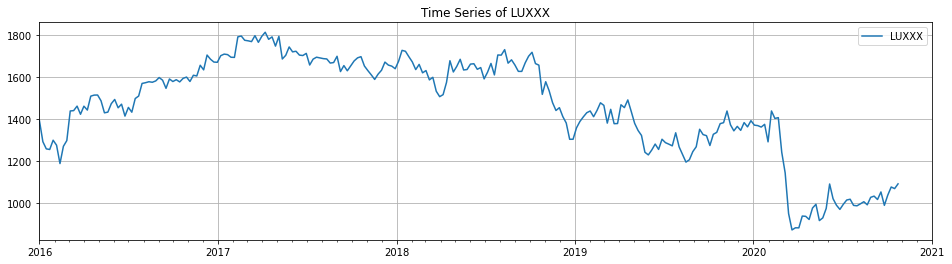

In [41]:

def plot_1ts(dataframe,timeseriesname):
    x=dataframe.index
    Y=dataframe[f'{timeseriesname}']
    fig, ax = plt.subplots(figsize=(16,4))
    ax.plot(x, Y, label=timeseriesname)
    ax.title.set_text(f'Time Series of {timeseriesname}')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.legend()
    plt.grid(True)
    # round to nearest years.
    datemin = np.datetime64(x[0],'Y')
    datemax = np.datetime64(x[len(x)-1],'Y') + np.timedelta64(1, 'Y')
    ax.set_xlim(datemin, datemax)
    # format the coords message box
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    plt.show()
    
plot_1ts(df,"LUXXX")

## 4.2 Write a Python function that graphs 2 time series on the same plot, with labels

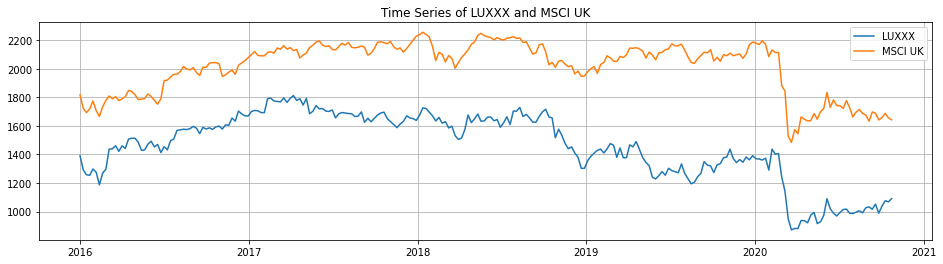

In [40]:


def plot_2ts(dataframe,ts1,ts2):
    fig, ax = plt.subplots(figsize=(16,4))
    x = dataframe.index
    ax.plot(x, dataframe[ts1], label=ts1)
    ax.plot(x, dataframe[ts2], label=ts2)
    ax.title.set_text(f'Time Series of {ts1} and {ts2}')
    plt.legend([ts1, ts2], loc ="best")
    plt.grid(True)
    
    plt.show()
    
plot_2ts(df,"LUXXX","MSCI UK")

## 4.3 Write a Python function that compares the two return series

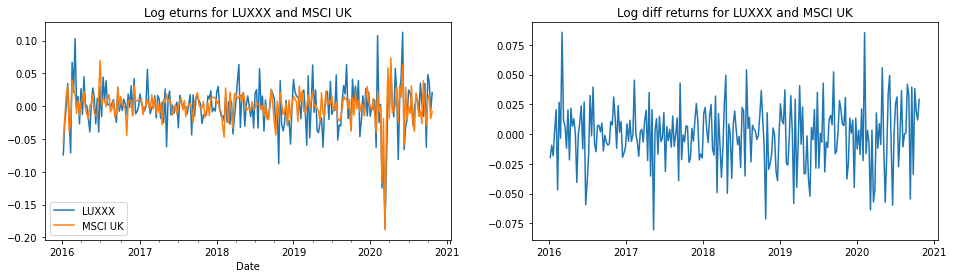

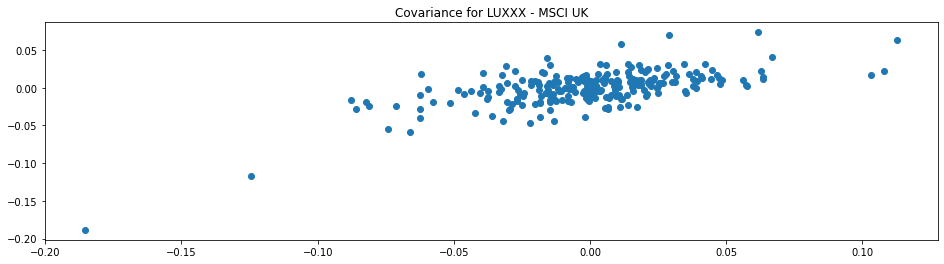

In [42]:
def log_return(prices):
  return np.log(prices).diff().dropna()

def plot_returns_diff(prices1, name1, prices2, name2):
  diff_prices = prices1 - prices2
  allprices = pd.concat((prices1, prices2), axis=1)

  plt.subplots(1, 2, figsize=(16,4))
  ax = plt.subplot(121)
  ax = allprices.plot(kind='line', ax=ax)
  plt.title('Log eturns for %s and %s' % (name1, name2))

  ax = plt.subplot(122)
  plt.plot(diff_prices)
  plt.title('Log diff returns for %s and %s' % (name1, name2))

  plt.show()
  
def plot_scatter(prices1, name1, prices2, name2):
  fix, ax = plt.subplots(figsize=(16,4))
  plt.title('Covariance for %s - %s' % (name1, name2))
  plt.scatter(prices1, prices2)
  plt.show()
  

def compare_tickers(df, name1, name2):
  prices1 = df[name1]
  prices2 = df[name2]
  returns1 = log_return(prices1)
  returns2 = log_return(prices2)
  plot_returns_diff(returns1, name1, returns2, name2)
  plot_scatter(returns1, name1, returns2, name2)

compare_tickers(df, 'LUXXX', 'MSCI UK')


# Two-dimensional data summaries

## 5.1 Pick 8 of the columns.  Compute all the pairwise correlations using Pearson correlation

We have chosen following indexes for comparison

In [12]:
indexes = ['LUXXX', 'MSCI ARGENTINA', 'BLP ORIENTE MEDIO', 'MSCI AUSTRALIA',
           'MSCI AUSTRIA', 'MSCI BELGIUM', 'MSCI UK', 'MSCI USA']
for idx, index_name in enumerate(indexes):
  print('%d. %s' % (idx+1, index_name))

df8 = df[indexes]

1. LUXXX
2. MSCI ARGENTINA
3. BLP ORIENTE MEDIO
4. MSCI AUSTRALIA
5. MSCI AUSTRIA
6. MSCI BELGIUM
7. MSCI UK
8. MSCI USA


In [13]:
print('Pearson correlation for indexes:')
pearsoncorr = df8.corr(method='pearson')
pearsoncorr

Pearson correlation for indexes:


,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI UK,MSCI USA
LUXXX,1.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.754859,-0.462818
MSCI ARGENTINA,0.754584,1.000000,0.740835,-0.160676,0.604493,0.747766,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,1.000000,-0.124534,0.387526,0.925401,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,1.000000,0.516601,-0.027924,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,1.000000,0.495019,0.876490,0.141123
MSCI BELGIUM,0.850111,0.747766,0.925401,-0.027924,0.495019,1.000000,0.627655,-0.602246
MSCI UK,0.754859,0.517648,0.516283,0.607045,0.876490,0.627655,1.000000,0.050319
MSCI USA,-0.462818,-0.461817,-0.652986,0.715744,0.141123,-0.602246,0.050319,1.000000


## 5.2 Recompute the calculation, instead of using Spearman correlation

In [14]:
# Spearman correlation
print('Spearman correlation for indexes:')
spearmancorr = df8.corr(method='spearman')
spearmancorr

Spearman correlation for indexes:


,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI UK,MSCI USA
LUXXX,1.000000,0.760165,0.763908,0.008914,0.630077,0.728380,0.646838,-0.445698
MSCI ARGENTINA,0.760165,1.000000,0.762681,-0.170967,0.543215,0.815686,0.486479,-0.564665
BLP ORIENTE MEDIO,0.763908,0.762681,1.000000,-0.225116,0.305152,0.881598,0.382994,-0.668146
MSCI AUSTRALIA,0.008914,-0.170967,-0.225116,1.000000,0.522231,-0.222302,0.621821,0.727221
MSCI AUSTRIA,0.630077,0.543215,0.305152,0.522231,1.000000,0.368606,0.846133,0.121610
MSCI BELGIUM,0.728380,0.815686,0.881598,-0.222302,0.368606,1.000000,0.417859,-0.660276
MSCI UK,0.646838,0.486479,0.382994,0.621821,0.846133,0.417859,1.000000,0.137439
MSCI USA,-0.445698,-0.564665,-0.668146,0.727221,0.121610,-0.660276,0.137439,1.000000


## 5.3 Recompute the calculation, instead of using Kendall correlation

In [15]:
print('Kendall correlation for indexes:')
kendallcorr = df8.corr(method='kendall')
kendallcorr

Kendall correlation for indexes:


,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI UK,MSCI USA
LUXXX,1.000000,0.558401,0.580861,0.026877,0.457578,0.533989,0.461898,-0.277493
MSCI ARGENTINA,0.558401,1.000000,0.547910,-0.091383,0.382000,0.601097,0.335863,-0.313350
BLP ORIENTE MEDIO,0.580861,0.547910,1.000000,-0.117454,0.234036,0.704980,0.263804,-0.425590
MSCI AUSTRALIA,0.026877,-0.091383,-0.117454,1.000000,0.340839,-0.131216,0.433455,0.599336
MSCI AUSTRIA,0.457578,0.382000,0.234036,0.340839,1.000000,0.273741,0.677165,0.117130
MSCI BELGIUM,0.533989,0.601097,0.704980,-0.131216,0.273741,1.000000,0.321089,-0.430069
MSCI UK,0.461898,0.335863,0.263804,0.433455,0.677165,0.321089,1.000000,0.141213
MSCI USA,-0.277493,-0.313350,-0.425590,0.599336,0.117130,-0.430069,0.141213,1.000000


# Data selection

## 6.1 Choose one of the 35 variables to serve as your response variable (e.g., LUXXX)

In [16]:
# Lets pick 'MSCI UK'
msci_uk = df['MSCI UK']
all_other_indexes = df.drop(columns=['Date', 'DateX', 'MSCI UK'])

# Compare and contrast

## 7.1 What do these 2 methodologies have in common?

*   Both PCA and Lasso are linear methods. PCA use linear technics to reduce dimenstions while Lasso estimates target variable as a sparse linear function of the inputs
*   The goal of both method (PCA & Lasso) to reduce number of parameters to fit the model
*   All correlations (Pearson, Spearman, Kendall) measure the strength of association between two variables and the direction of the relationship.

## 7.2 How do these 2 methodologies differ?


*   Lasso regression is not a dimension reduction technique as PCA instead it's used for variable selection
*   PCA is not typically used for prediction, but rather for finding relationships between all the variables simultaneously. While Lasso is good for prediction.
*   Lasso uses labels, while PCA does not
*   Kendall correlation is more efficient than Spearman and is preferred when there are small samples.
*  Kendall correlation has O(n^2) complexity comparing with O(n logn) of Spearman correlation.



# Principal components

## 8.1 Perform principal components on the level changes of the other 34 columns

In [17]:
pca = PCA()

msci_uk_diff = msci_uk.diff().dropna()
all_diffs = all_other_indexes.diff().dropna()

# normalize before use
all_diffs_norm = all_diffs / np.std(all_diffs)
msci_uk_diff_norm = msci_uk_diff /np.std(msci_uk_diff)

pca.fit(all_diffs_norm)

PCA()

## 8.2 Show the amount of variation explained by the first 5 components.

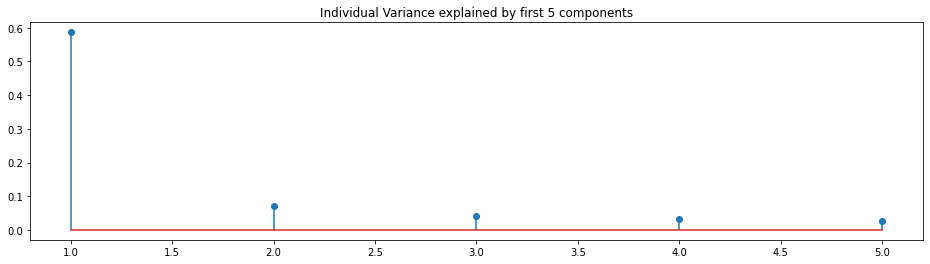

In [18]:
# select first 5 columns
all_variances = pca.explained_variance_ratio_
selected_variances = all_variances[:5]
selected_indexes = np.arange(1, len(selected_variances) + 1)

fig, ax = plt.subplots(figsize=(16,4))
ax.stem(selected_indexes, selected_variances, use_line_collection=True)
plt.title('Individual Variance explained by first 5 components')
plt.show()

In [19]:
print('Individual Variance explained by first 5 components:', selected_variances)

Individual Variance explained by first 5 components: [0.58654677 0.0718505  0.04013279 0.03242027 0.026931  ]


## 8.3 How many components are needed to express 80% of the variation of the data?

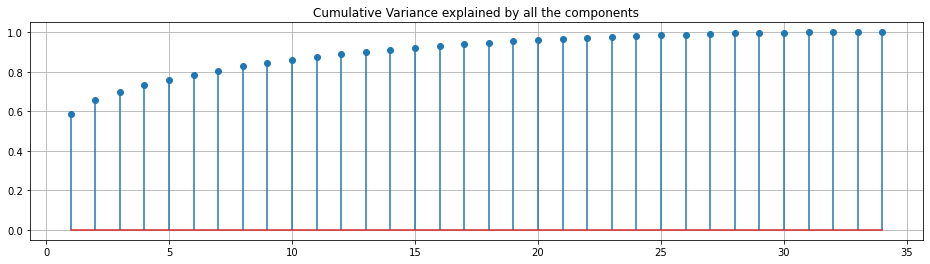

In [20]:
cum_variance = all_variances.cumsum()
fig, ax = plt.subplots(figsize=(16,4))

components = np.arange(1, len(all_variances)+1)
ax.stem(components, cum_variance, use_line_collection=True)
plt.title('Cumulative Variance explained by all the components')
plt.grid()
plt.show()

Number of components expression 80% of the variation of the data: 7


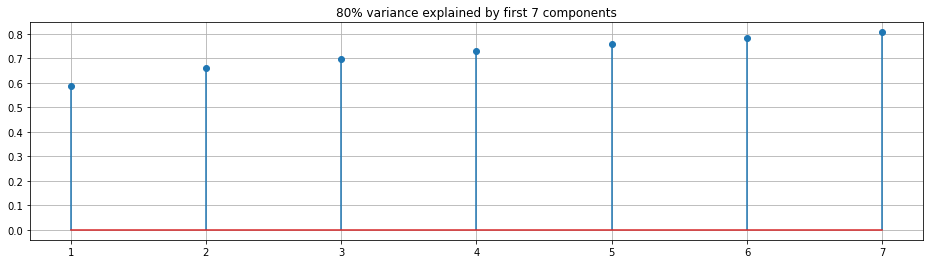

In [21]:
num_components_80_level = np.where(cum_variance > 0.80)[0][0] + 1
print('Number of components expression 80% of the variation of the data:', num_components_80_level)

fig, ax = plt.subplots(figsize=(16,4))
components1 = np.arange(1, num_components_80_level + 1)
ax.stem(components1, cum_variance[:num_components_80_level], use_line_collection=True)
plt.title('80% variance explained by first {} components'.format(num_components_80_level))
plt.grid()

## 8.4 What is your interpretation of the 1st component?

The first principal component defines a direction which maximizes the variance of the underlying data. Moreover first component also known as first principal component (PC1) is eigen vector of the data covariance matrix or singular value decomposition of the data matrix.

# PCA Regression and Lasso Regresssion

## 9.1 Run a linear regression of Y versus the first N principal component scores.

According to our analyze in section 8.3; 7 components expess 80% of variance in our data; we will pick N=7

In [22]:
N = 7

In [23]:
# in section 6.1 we defined:  msci_uk , all_other_indexes
# later in section 8.1 we found : msci_uk_diff, all_diffs,  all_diffs_norm, msci_uk_diff_norm
projection = pca.transform(all_diffs_norm)
projection_N = projection[:, :N]

regr = linear_model.LinearRegression()
regr.fit(projection_N, msci_uk_diff_norm)
r2 = regr.score(projection_N, msci_uk_diff_norm)

In [24]:
print('R^2 Score:', r2)
print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

R^2 Score: 0.7767948733071309
Intercept: -0.01616236228237522
Coefficients: [-0.1915665   0.1219595  -0.05571444 -0.03865054  0.02575444 -0.0342237
  0.0376728 ]


# Lasso regression

## 10.1 For the lasso, use at least 1000 different values of the penalty parameter.  Be sure to split the data into testing and training, with 2/3 for training and 1/3 for testing.

In [25]:
# in section 6.1 we defined:  msci_uk , all_other_indexes
# later in section 8.1 we found : msci_uk_diff, all_diffs,  all_diffs_norm, msci_uk_diff_norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lasso_path

X_train, X_test, y_train, y_test = train_test_split(all_diffs_norm,  
                                                    msci_uk_diff_norm, 
                                                    random_state=1000, test_size=1/3)

powers = np.linspace(-6,1,100) # define 
alphas = 10**powers
alphas, coefs, _ = lasso_path(X_train, y_train, alphas=alphas)

## 10.2 Graph the overall model mismatch for each of the 1000 values of the penalty parameter

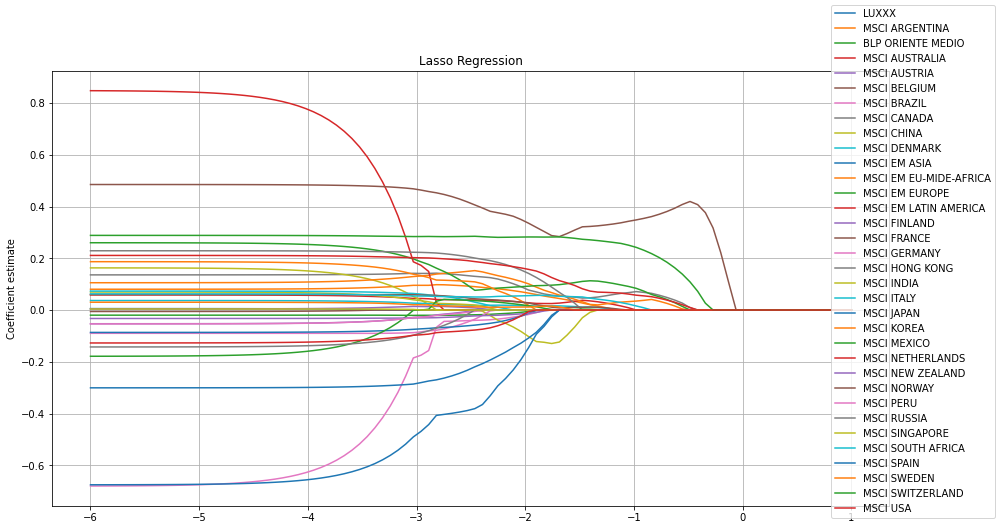

In [26]:
# inverse the coefficients as penalty increases
invCoefs = coefs[:,::-1]
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(powers, invCoefs.T)
ax.set_title('Lasso Regression') 
ax.set_ylabel('Coefficient estimate')
fig.legend(all_diffs.columns)
plt.grid()

As the penalty increases coefficients goes to 0

## 10.3 Find a lasso model that includes no more than 7 predictors

In [27]:
# remove small coefficients and num of parameters <=7
coefs_selected = coefs[:, (np.sum(np.abs(coefs)>0.0001, axis=0) <= 7)]
print('The number of models having no more than 7 coefficients:', coefs_selected.shape[1]) 

The number of models having no more than 7 coefficients: 29


In [28]:
# remove small coefficients and pick model with smallest penalty with num of parameters <=7
from sklearn.linear_model import Lasso
index = np.array(np.where(np.sum(np.abs(coefs)>0.0001, axis=0) <= 7)).max()
lasso = Lasso(alpha=alphas[index])
lasso.fit(X_train, y_train)

lasso_coefs = lasso.coef_ * (np.abs(lasso.coef_)>0.0001) 

selected_cov = all_diffs.columns[np.abs(lasso_coefs) > 0.0001] 
selected_cov_weights = lasso_coefs[np.abs(lasso_coefs) > 0.0001] 

model = pd.DataFrame( zip(selected_cov, selected_cov_weights), columns = ['Index', 'Weight'])
model_sorted = model.sort_values(by='Weight', ascending=False)
print(model_sorted.to_string(index=False))


                  Index    Weight
            MSCI FRANCE  0.323212
       MSCI SWITZERLAND  0.249558
       MSCI NETHERLANDS  0.083745
            MSCI CANADA  0.074199
         MSCI EM EUROPE  0.073624
 MSCI EM EU-MIDE-AFRICA  0.051162
      MSCI SOUTH AFRICA  0.000641


Now we calculate the std deviation of the projection errors for both PCA and Lasso Regression

In [29]:
lasso_projection = lasso.predict(X_test)
lasso_mean_error = np.mean((lasso_projection - y_test)**2)
print('Lasso prediction root mean squared error ', np.sqrt(lasso_mean_error))
print('Lasso Regression: R^2 score on test set', lasso.score(X_test, y_test)*100)

Lasso prediction root mean squared error  0.5158437232176096
Lasso Regression: R^2 score on test set 75.27163515250383


In [30]:
# fit PCA and project  with test data
from sklearn.metrics import r2_score
pca = PCA()
pca.fit(X_train)

pca_transform_train = pca.transform(X_train)
pca_transform_N_train = pca_transform_train[:, :N]

regr = linear_model.LinearRegression()
regr.fit(pca_transform_N_train, y_train)

pca_transform = pca.transform(X_test)
pca_transform_N = pca_transform[:, :N]

pca_projection = regr.predict(pca_transform_N)
pca_mean_error = np.mean((pca_projection - y_test)**2)
print('PCA prediction root mean squared error ', np.sqrt(pca_mean_error))
print('PCA Regression: R^2 score on test set', r2_score(y_test, pca_projection)*100)

PCA prediction root mean squared error  0.5217598165438716
PCA Regression: R^2 score on test set 74.7011746765084


Let's plot the graphs for actual and predicted returns for MSCI UK index and model indexes which can be used to predict the chosen index returns

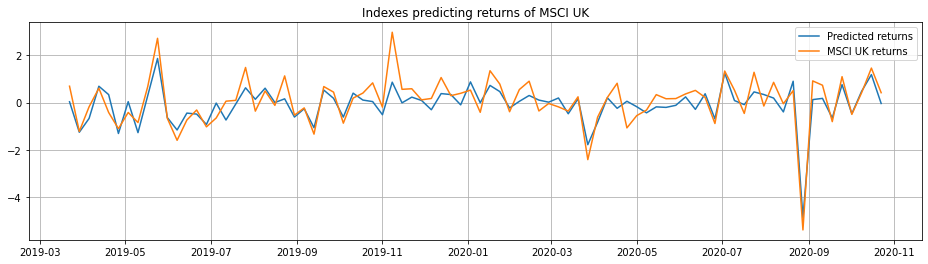

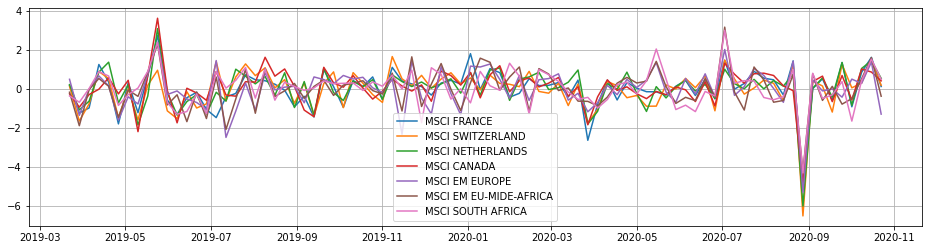

In [31]:
x_dates = df['DateX'][-len(lasso_projection):]
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(x_dates, lasso_projection, label="Predicted returns")
ax.plot(x_dates, y_test, label="MSCI UK returns")
ax.set_title("Predicted vs Actual returns for MSCI UK")
plt.grid()
plt.legend()

ax.set_title("Indexes predicting returns of MSCI UK")
fig, ax = plt.subplots(figsize=(16,4))
for idx_name in model_sorted['Index']:
  ax.plot(x_dates, X_test[idx_name], label=idx_name)

plt.legend()
plt.grid()
plt.show()
